# Name : Dawood Sarfarz

# Roll no : 20P-0153

# Section : BSCS - 6B

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

In [97]:
df = pd.read_csv("titanic_train.csv")

In [98]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [99]:
df.shape

(850, 15)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [101]:
df.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [102]:
label_encoder = preprocessing.LabelEncoder()
null = df.isnull().sum()
print(null)

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64


In [103]:
df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [104]:
print("Data Set shap ====> ", df.shape)

Data Set shap ====>  (850, 15)


In [105]:
check = df['age'].isnull().values.any()
print (check)
if(check):
    avg_age = int(round(df['age'].mean()))
    df['age'] = df['age'].replace(np.nan,avg_age)

True


In [106]:
#largest number of commuters/passengers embarked from southampton so replace missing values with mode of the column
df.embarked.fillna(df.embarked.mode()[0], inplace = True)
avg_fare = int(round(df['fare'].mean()))
df['fare'] = df['fare'].replace(np.nan,avg_fare)

In [107]:
#cabin has more than 200 values missing which means most people didnt have cabin and were in the main lobby so we cannot truly predict! so replacing missing values with new class 'NA'
df.cabin = df.cabin.fillna('NA')

In [108]:
df.cabin

0       NA
1       NA
2       NA
3       NA
4       NA
      ... 
845    C39
846    B37
847     NA
848     NA
849     NA
Name: cabin, Length: 850, dtype: object

In [109]:
#As parch and sibsp both represents family we can combine it
df['family'] = df.parch + df.sibsp
df.drop(['parch','sibsp'],axis=1,inplace = True)

print(("Most are going to NewYork so replace by NewYork",df['home.dest'].mode()[0]))
df['home.dest'].fillna(df['home.dest'].mode()[0], inplace = True)

('Most are going to NewYork so replace by NewYork', 'New York, NY')


In [110]:
# As there are too many values in the boat this means not many people reached to the boat so we replace missing values with NA
df.boat = df.boat.fillna('NA')
df.drop(['name','passenger_id'],axis=1,inplace=True)

In [111]:
#Now we replace categorical values by numerical values and also scale the columns
for column in df:
    df[column] = label_encoder.fit_transform(df[column])
y = df['survived']
df.drop('survived',axis = 1,inplace = True)
test_X, train_X, test_Y, train_Y = train_test_split(df,y,test_size=0.3, random_state=42, shuffle=True)

array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'ticket'}>,
        <Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'cabin'}>],
       [<Axes: title={'center': 'embarked'}>,
        <Axes: title={'center': 'boat'}>,
        <Axes: title={'center': 'body'}>],
       [<Axes: title={'center': 'home.dest'}>,
        <Axes: title={'center': 'family'}>, <Axes: >]], dtype=object)

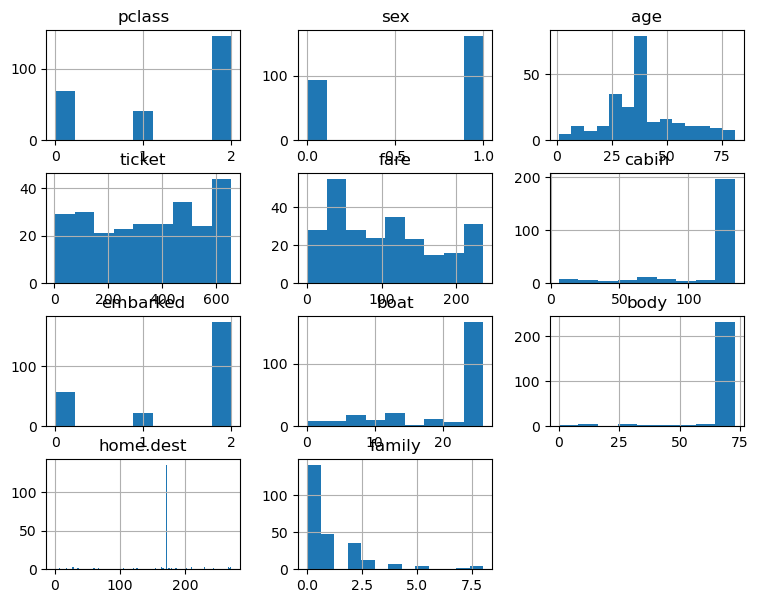

In [112]:
train_X.hist(bins="auto",figsize=(9,7),grid=True)


<Axes: >

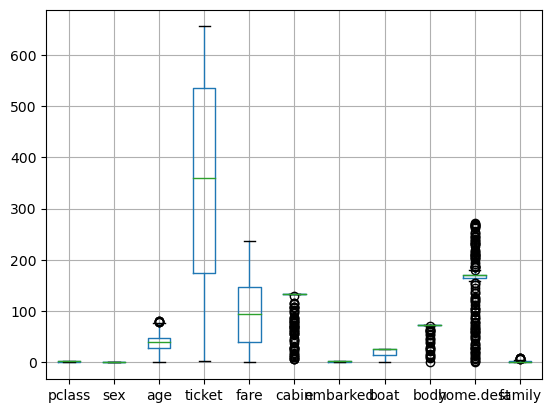

In [113]:
train_X.boxplot()

In [114]:
train_X

,pclass,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,family
512,2,1,23,213,17,134,0,26,73,171,2
357,2,1,40,282,25,134,1,26,73,171,0
110,2,1,22,308,58,134,2,26,73,171,0
684,1,1,39,652,65,134,2,26,73,104,0
39,1,0,39,239,130,134,2,10,73,171,1
...,...,...,...,...,...,...,...,...,...,...,...
450,1,1,65,613,130,134,2,26,27,265,1
193,2,1,26,412,89,134,2,26,73,171,0
796,0,1,48,598,236,29,0,12,73,9,1
605,2,0,40,479,125,134,2,26,73,171,4


In [115]:
df.head()

,pclass,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,family
0,2,0,40,283,25,134,1,4,73,171,0
1,2,1,50,257,48,134,2,26,73,56,0
2,2,0,40,307,124,134,2,26,73,171,2
3,1,0,69,237,120,134,2,13,73,52,4
4,1,1,53,228,77,134,2,26,73,11,0


In [116]:
mlp = MLPClassifier(solver = "lbfgs",alpha = 1e-5,hidden_layer_sizes = (4,4),random_state = 1)
mlp.fit(train_X,train_Y)
y_pred = mlp.predict(test_X)
y_score = mlp.score(test_X,test_Y)
accuracy = accuracy_score(test_Y, y_pred)
precision = precision_score(test_Y, y_pred)
recall = recall_score(test_Y, y_pred)
f1 = f1_score(test_Y, y_pred)
print("Two hidden layers with  4,4 neurons")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Two hidden layers with  4,4 neurons
Accuracy: 0.6386554621848739
Precision: 0.0
Recall: 0.0
F1 score: 0.0


In [117]:
mlp = MLPClassifier(solver = "lbfgs",alpha = 1e-5,hidden_layer_sizes = (40,60),random_state = 1)
mlp.fit(train_X,train_Y)
y_pred = mlp.predict(test_X)
y_score = mlp.score(test_X,test_Y)
accuracy = accuracy_score(test_Y, y_pred)
precision = precision_score(test_Y, y_pred)
recall = recall_score(test_Y, y_pred)
f1 = f1_score(test_Y, y_pred)
print("Two hidden layers with  40,60 neurons")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Two hidden layers with  40,60 neurons
Accuracy: 0.9109243697478991
Precision: 0.8375
Recall: 0.9348837209302325
F1 score: 0.8835164835164835


In [118]:
mlp = MLPClassifier(solver = "lbfgs",alpha = 1e-5,hidden_layer_sizes = (30,30,40),random_state = 1)
mlp.fit(train_X,train_Y)
y_pred = mlp.predict(test_X)
y_score = mlp.score(test_X,test_Y)
accuracy = accuracy_score(test_Y, y_pred)
precision = precision_score(test_Y, y_pred)
recall = recall_score(test_Y, y_pred)
f1 = f1_score(test_Y, y_pred)
print("Three hidden layers with 30 , 30 , 30 neurons")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Three hidden layers with 30 , 30 , 30 neurons
Accuracy: 0.9277310924369748
Precision: 0.864406779661017
Recall: 0.9488372093023256
F1 score: 0.9046563192904655


In [119]:
mlp = MLPClassifier(solver = "lbfgs",alpha = 1e-5,hidden_layer_sizes = (50,50,50),random_state = 1)
mlp.fit(train_X,train_Y)
y_pred = mlp.predict(test_X)
y_score = mlp.score(test_X,test_Y)
accuracy = accuracy_score(test_Y, y_pred)
precision = precision_score(test_Y, y_pred)
recall = recall_score(test_Y, y_pred)
f1 = f1_score(test_Y, y_pred)
print("Three hidden layers with 30 , 30 , 30 neurons")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Three hidden layers with 30 , 30 , 30 neurons
Accuracy: 0.9210084033613445
Precision: 0.8589743589743589
Recall: 0.9348837209302325
F1 score: 0.8953229398663696


In [120]:
mlp = MLPClassifier(solver = "lbfgs" ,alpha = 1e-5, hidden_layer_sizes = (50, 50), random_state = 1)
mlp.fit(train_X,train_Y)
y_pred = mlp.predict(test_X)
y_score = mlp.score(test_X,test_Y)
accuracy = accuracy_score(test_Y, y_pred)
precision = precision_score(test_Y, y_pred)
recall = recall_score(test_Y, y_pred)
f1 = f1_score(test_Y, y_pred)
print("Two hidden layers with 50 , 50 neurons")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Two hidden layers with 50 , 50 neurons
Accuracy: 0.9210084033613445
Precision: 0.8559322033898306
Recall: 0.9395348837209302
F1 score: 0.8957871396895787


In [121]:
mlp = MLPClassifier(solver = "lbfgs",alpha = 1e-5,hidden_layer_sizes = (46,54),random_state = 1)
mlp.fit(train_X,train_Y)
y_pred = mlp.predict(test_X)
y_score = mlp.score(test_X,test_Y)
accuracy = accuracy_score(test_Y, y_pred)
precision = precision_score(test_Y, y_pred)
recall = recall_score(test_Y, y_pred)
f1 = f1_score(test_Y, y_pred)
print("Three hidden layers with 46 , 54 neurons")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Three hidden layers with 46 , 54 neurons
Accuracy: 0.6386554621848739
Precision: 0.0
Recall: 0.0
F1 score: 0.0


In [122]:
mlp = MLPClassifier(solver = "lbfgs",alpha = 1e-5,hidden_layer_sizes = (30,30,40, 34),random_state = 1)
mlp.fit(train_X,train_Y)
y_pred = mlp.predict(test_X)
y_score = mlp.score(test_X,test_Y)
accuracy = accuracy_score(test_Y, y_pred)
precision = precision_score(test_Y, y_pred)
recall = recall_score(test_Y, y_pred)
f1 = f1_score(test_Y, y_pred)
print("Four hidden layers with 30, 30, 40, 34 neurons")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Four hidden layers with 30, 30, 40, 34 neurons
Accuracy: 0.9260504201680673
Precision: 0.8669527896995708
Recall: 0.9395348837209302
F1 score: 0.9017857142857143


In [123]:
mlp = MLPClassifier(solver = "lbfgs",alpha = 1e-5,hidden_layer_sizes = (130,130,40),random_state = 1)
mlp.fit(train_X,train_Y)
y_pred = mlp.predict(test_X)
y_score = mlp.score(test_X,test_Y)
accuracy = accuracy_score(test_Y, y_pred)
precision = precision_score(test_Y, y_pred)
recall = recall_score(test_Y, y_pred)
f1 = f1_score(test_Y, y_pred)
print("Three hidden layers with 130 , 130 , 40 neurons")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Three hidden layers with 130 , 130 , 40 neurons
Accuracy: 0.9310924369747899
Precision: 0.8849557522123894
Recall: 0.9302325581395349
F1 score: 0.9070294784580499


In [124]:
mlp = MLPClassifier(solver = "lbfgs",alpha = 1e-5,hidden_layer_sizes = (30,30,40),random_state = 1)
mlp.fit(train_X,train_Y)
y_pred = mlp.predict(test_X)
y_score = mlp.score(test_X,test_Y)
accuracy = accuracy_score(test_Y, y_pred)
precision = precision_score(test_Y, y_pred)
recall = recall_score(test_Y, y_pred)
f1 = f1_score(test_Y, y_pred)
print("Three hidden layers with 30 , 30 , 40 neurons")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Three hidden layers with 30 , 30 , 40 neurons
Accuracy: 0.9277310924369748
Precision: 0.864406779661017
Recall: 0.9488372093023256
F1 score: 0.9046563192904655


In [125]:
mlp = MLPClassifier(solver = "lbfgs",alpha = 1e-5,hidden_layer_sizes = (50 , 50),random_state = 1)
mlp.fit(train_X,train_Y)
y_pred = mlp.predict(test_X)
y_score = mlp.score(test_X,test_Y)
accuracy = accuracy_score(test_Y, y_pred)
precision = precision_score(test_Y, y_pred)
recall = recall_score(test_Y, y_pred)
f1 = f1_score(test_Y, y_pred)
print("Three hidden layers with 50 ,50 neurons")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Three hidden layers with 50 ,50 neurons
Accuracy: 0.9210084033613445
Precision: 0.8559322033898306
Recall: 0.9395348837209302
F1 score: 0.8957871396895787


In [126]:
mlp = MLPClassifier(solver = "lbfgs",alpha = 1e-5,hidden_layer_sizes = (50, 50, 50, 50, 50),random_state = 1)
mlp.fit(train_X,train_Y)
y_pred = mlp.predict(test_X)
y_score = mlp.score(test_X,test_Y)
accuracy = accuracy_score(test_Y, y_pred)
precision = precision_score(test_Y, y_pred)
recall = recall_score(test_Y, y_pred)
f1 = f1_score(test_Y, y_pred)
print("Five hidden layers with 50 , 50 , 50 , 50 , 50 neurons")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Five hidden layers with 50 , 50 , 50 , 50 , 50 neurons
Accuracy: 0.9411764705882353
Precision: 0.8982300884955752
Recall: 0.9441860465116279
F1 score: 0.9206349206349206


In [127]:
mlp = MLPClassifier(solver = "lbfgs",alpha = 1e-5,hidden_layer_sizes = (5,5),random_state = 1)
mlp.fit(train_X,train_Y)
y_pred = mlp.predict(test_X)
y_score = mlp.score(test_X,test_Y)
accuracy = accuracy_score(test_Y, y_pred)
precision = precision_score(test_Y, y_pred)
recall = recall_score(test_Y, y_pred)
f1 = f1_score(test_Y, y_pred)
print("Two hidden layers with 5 , 5 neurons")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Two hidden layers with 5 , 5 neurons
Accuracy: 0.6386554621848739
Precision: 0.0
Recall: 0.0
F1 score: 0.0


# Conclusion as Hidden Layers goes high Accuracy, Precision , Recall ,  F1 score goes high